<a href="https://colab.research.google.com/github/Veena4512/Smart_Bin_for_Waste_Management/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d techsash/waste-classification-data
!unzip waste-classification-data.zip


In [ ]:
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import plot_model


In [ ]:
from glob import glob
x_data = []
y_data = []

for category in glob(train_dir+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:13<00:00, 939.87it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

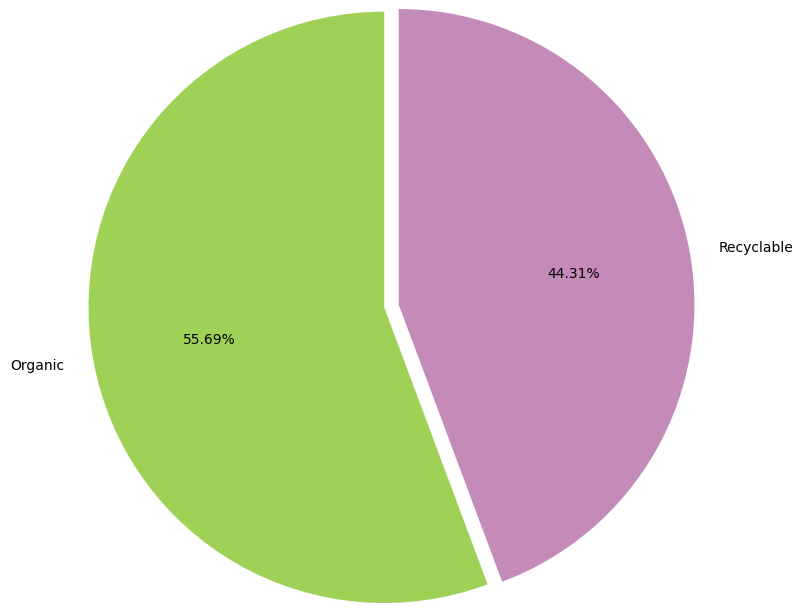

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

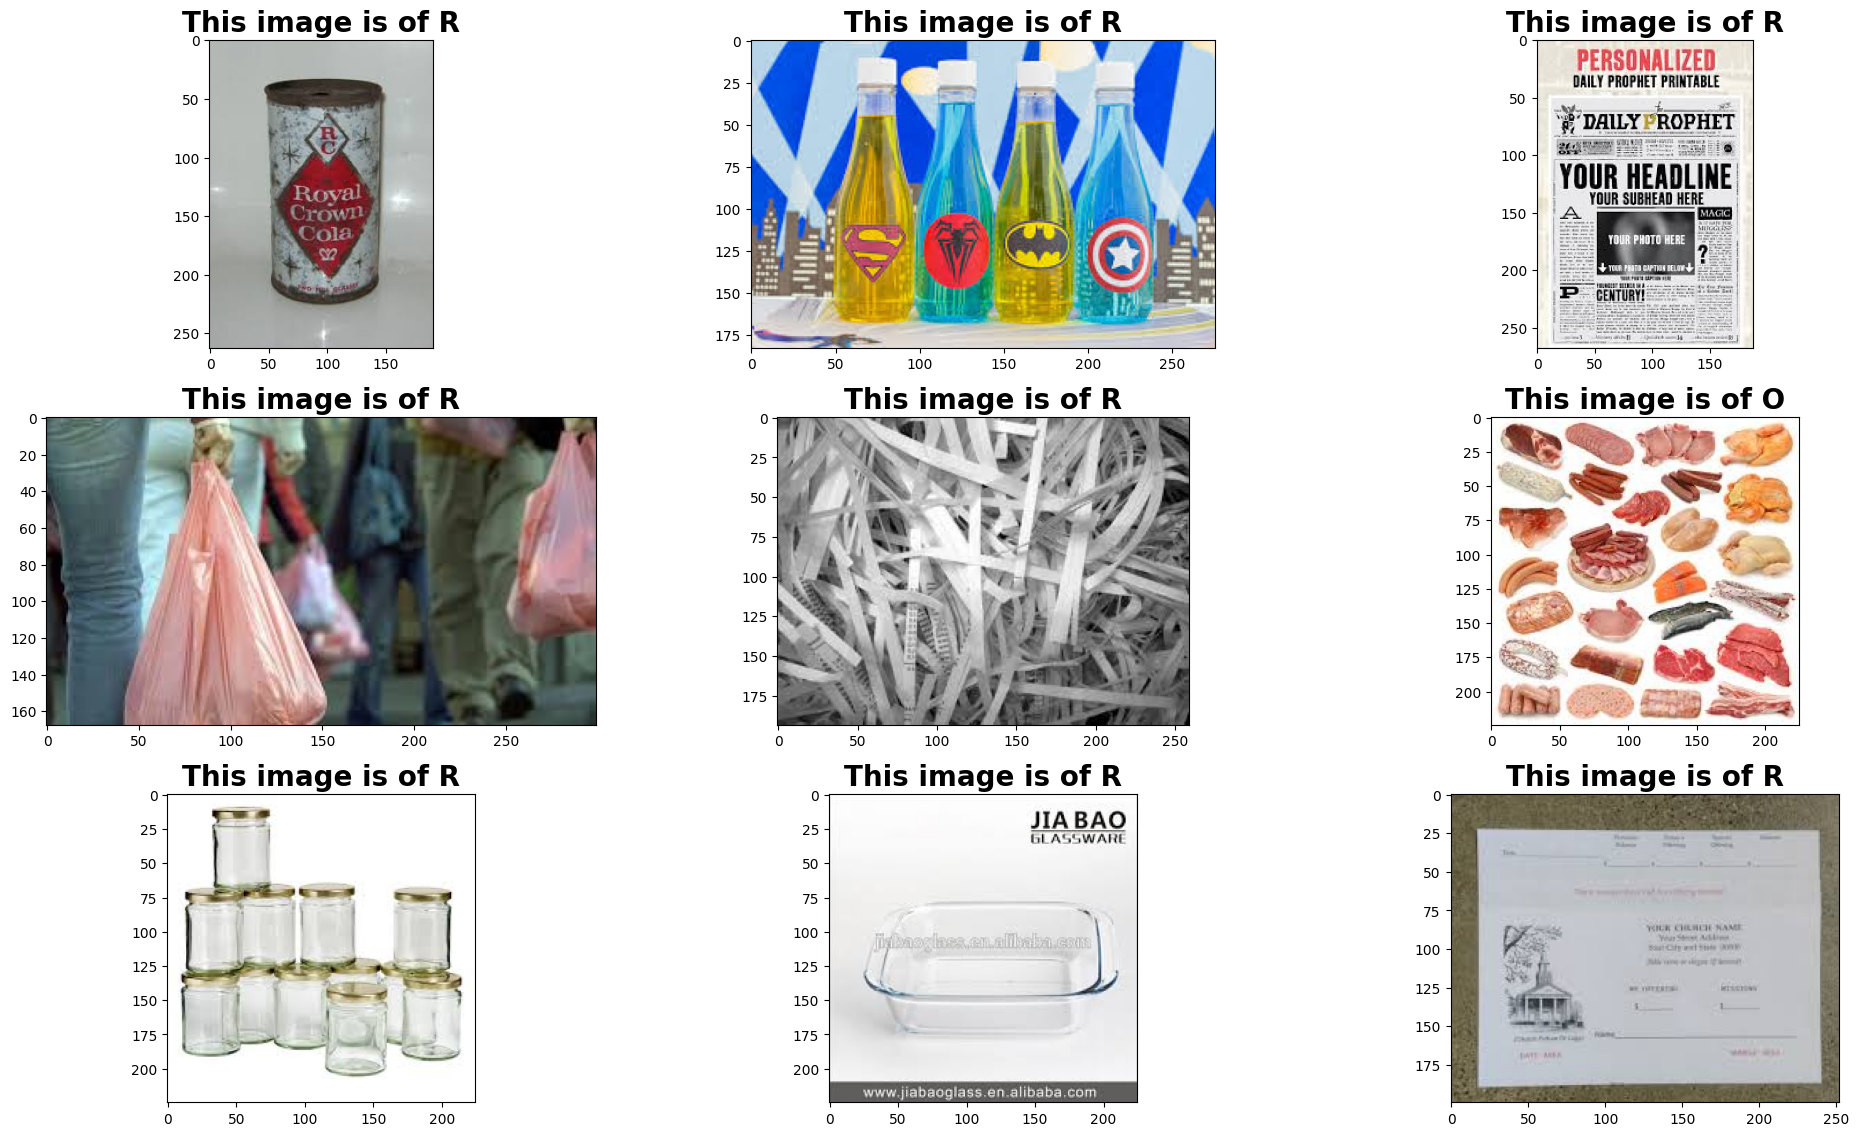

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_dir + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
from keras.layers import Activation, Dropout


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

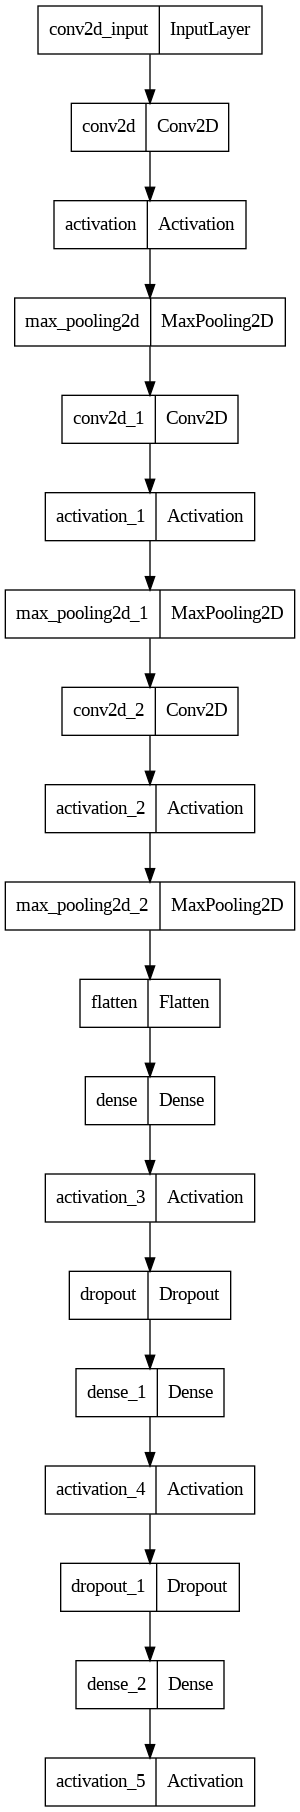

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 2764s 31s/step - loss: 0.5076 - accuracy: 0.7825 - val_loss: 0.3812 - val_accuracy: 0.8540
Epoch 2/10
89/89 [==============================] - 2643s 30s/step - loss: 0.4207 - accuracy: 0.8262 - val_loss: 0.3314 - val_accuracy: 0.8687
Epoch 3/10
89/89 [==============================] - 2668s 30s/step - loss: 0.3779 - accuracy: 0.8469 - val_loss: 0.2838 - val_accuracy: 0.8830
Epoch 4/10
89/89 [==============================] - 2580s 29s/step - loss: 0.3470 - accuracy: 0.8598 - val_loss: 0.3159 - val_accuracy: 0.8770
Epoch 5/10
89/89 [==============================] - 2552s 29s/step - loss: 0.3253 - accuracy: 0.8696 - val_loss: 0.2917 - val_accuracy: 0.8758
Epoch 6/10
89/89 [==============================] - 2616s 29s/step - loss: 0.2945 - accuracy: 0.8835 - val_loss: 0.3240 - val_accuracy: 0.8798
Epoch 7/10
89/89 [==============================] - 2541s 29s/step - loss: 0.2710 - accuracy: 0.8932 - val_loss: 0.3118 - val_accuracy: 0.8731

hi veeenoiiiii
hiii

hiiiii


In [ ]:
import pickle
with open('v1.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
from keras.models import Sequential,save_model,load_model
model.save("mymodel.h5")
loaded_model = load_model("mymodel.h5")

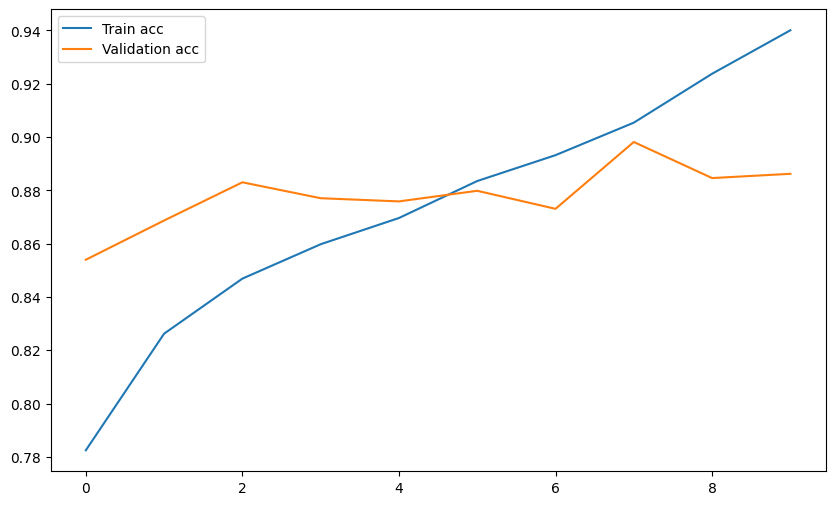

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

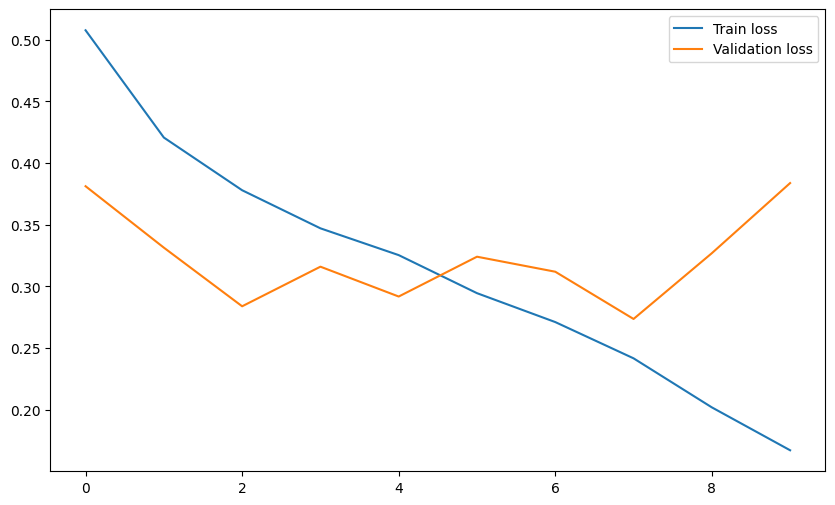

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 313ms/step
This image -> Recyclable


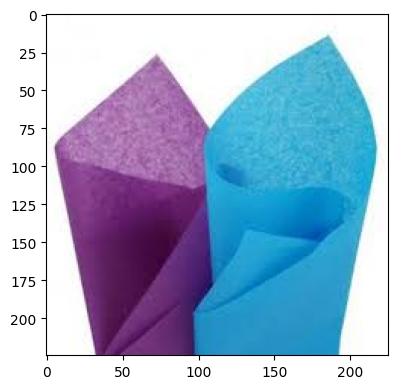

In [ ]:
test_img = cv2.imread("/content/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [ ]:
loss, accuracy = model.evaluate(test_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8862


In [ ]:
print(hist.history["accuracy"])

[0.7824853658676147, 0.826227605342865, 0.8468799591064453, 0.8597766160964966, 0.8696153163909912, 0.8834869861602783, 0.893192708492279, 0.9053802490234375, 0.9237280488014221, 0.9400372505187988]
